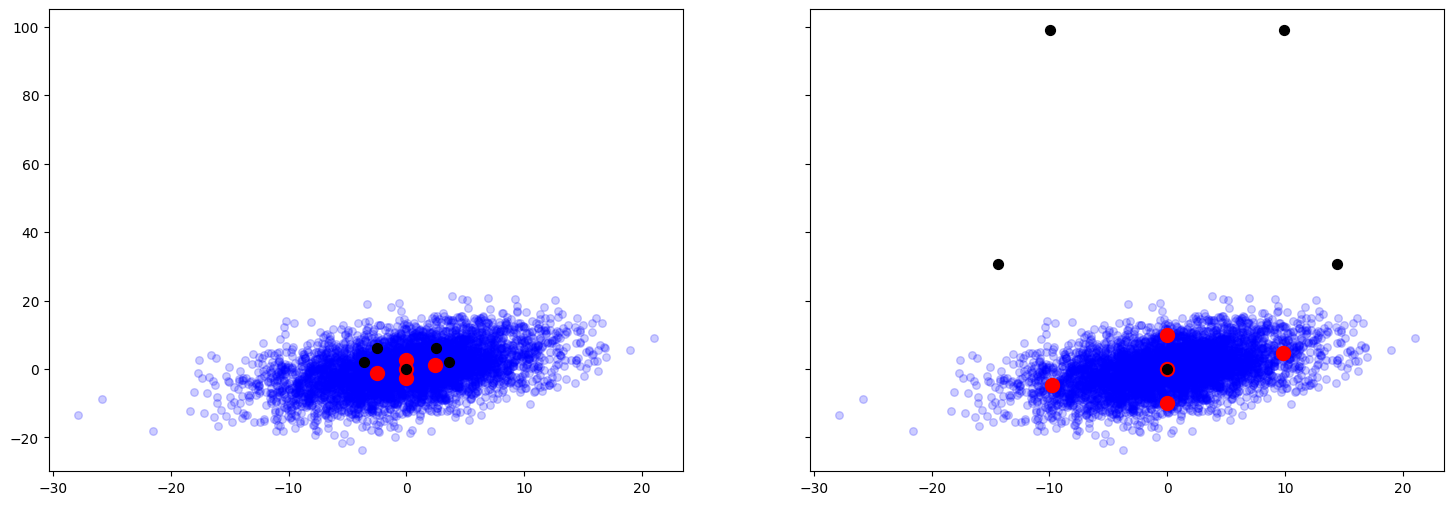

In [3]:
from filterpy.kalman import unscented_transform, MerweScaledSigmaPoints, JulierSigmaPoints, SimplexSigmaPoints
import scipy.stats as stats
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt


def f_nonlinear_xy(x, y):
    return np.array([x + y, .1*x**2 + y*y])


# initial mean and covariance
mean = (0., 0.)
p = np.array([[32., 15], [15., 40.]])

# create sigma points and weights
n = 2
points = MerweScaledSigmaPoints(n=n, alpha=.3, beta=2., kappa=.1)
sigmas = points.sigma_points(mean, p)

points_julier = JulierSigmaPoints(n=n, kappa=1)
sigmas_julier = points_julier.sigma_points(mean, p)

#points_simplex = SimplexSigmaPoints(n=2, alpha=1)
#sigmas_simplex = points_simplex.sigma_points(mean, p)


### pass through nonlinear function
sigmas_f = np.empty((5, 2))
for i in range(5):
    sigmas_f[i] = f_nonlinear_xy(sigmas[i, 0], sigmas[i ,1])

# pass other sigma points through function
sigmas_f_julier = np.empty((5, 2))
for i in range(5):
    sigmas_f_julier[i] = f_nonlinear_xy(sigmas_julier[i, 0], sigmas_julier[i ,1])

# sigmas_f_simplex = np.empty((5, 2))
# for i in range(5):
#     sigmas_f_simplex[i] = f_nonlinear_xy(sigmas_simplex[i, 0], sigmas_simplex[i ,1])


### use unscented transform to get new mean and covariance
ukf_mean, ukf_cov = unscented_transform(sigmas_f, points.Wm, points.Wc)

# generate random points
np.random.seed(100)
xs, ys = multivariate_normal(mean=mean, cov=p, size=5000).T

# plot_monte_carlo_mean(xs, ys, f_nonlinear_xy, ukf_mean, 'Unscented Mean')
# ax = plt.gcf().axes[0]
# ax.scatter(sigmas[:,0], sigmas[:,1], c='r', s=30);


fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharex=True, sharey=True)

ax[0].scatter(xs, ys, c='b', s=30, alpha=.2)
ax[0].scatter(sigmas[:,0], sigmas[:,1], c='r', s=100)
ax[0].scatter(sigmas_f[:,0], sigmas_f[:,1], c='k', s=50)

ax[1].scatter(xs, ys, c='b', s=30, alpha=.2)
ax[1].scatter(sigmas_julier[:,0], sigmas_julier[:,1], c='r', s=100)
ax[1].scatter(sigmas_f_julier[:,0], sigmas_f_julier[:,1], c='k', s=50)


# ax.scatter(ukf_mean[0], ukf_mean[1], c='g', s=50);

for a in ax:
    # a.set_xlim(-15, 15)
    # a.set_ylim(-15, 15)
    # a.set_aspect('equal')
    # a.set_yscale('log')
   pass
